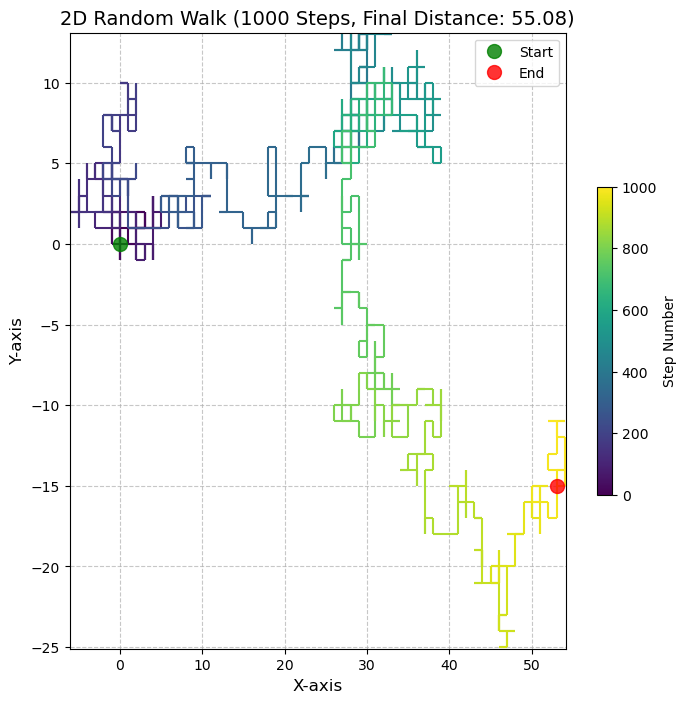

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

def random_walk_2d(num_steps=1000, step_size=1.0, animate=False):
    """
    Simulate a 2D random walk and visualize the path.

    Parameters:
        num_steps (int): Number of steps in the random walk.
        step_size (float): Size of each step.
        animate (bool): If True, display an animated plot; otherwise, show a static plot.

    Returns:
        None: Generates and saves a plot of the random walk.
    """
    # Validate input
    if num_steps < 1:
        raise ValueError("Number of steps must be positive.")
    if step_size <= 0:
        raise ValueError("Step size must be positive.")

    # Initialize position and path arrays
    position = np.array([0.0, 0.0])
    path = np.zeros((num_steps + 1, 2))
    path[0] = position

    # Generate random walk
    directions = np.random.randint(0, 4, num_steps)
    for i, direction in enumerate(directions):
        if direction == 0:
            position[0] += step_size  # Move right
        elif direction == 1:
            position[0] -= step_size  # Move left
        elif direction == 2:
            position[1] += step_size  # Move up
        else:
            position[1] -= step_size  # Move down
        path[i + 1] = position

    # Calculate final distance from origin
    final_distance = np.linalg.norm(path[-1])

    # Create figure for plotting
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title(f'2D Random Walk ({num_steps} Steps, Final Distance: {final_distance:.2f})', fontsize=14)

    # Plot settings
    x, y = path[:, 0], path[:, 1]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(0, num_steps)
    lc = plt.cm.ScalarMappable(norm=norm, cmap='viridis')

    if animate:
        # Initialize line for animation
        line, = ax.plot([], [], 'o-', color='blue', alpha=0.6, linewidth=2)
        ax.plot(x[0], y[0], 'go', label='Start', markersize=10, alpha=0.8)
        ax.plot(x[-1], y[-1], 'ro', label='End', markersize=10, alpha=0.8)

        def init():
            """Initialize the animation."""
            line.set_data([], [])
            return line,

        def update(frame):
            """Update the line for each animation frame."""
            line.set_data(x[:frame+1], y[:frame+1])
            return line,

        # Create animation
        ani = FuncAnimation(fig, update, init_func=init, frames=num_steps, interval=50, blit=True)
        ax.legend(fontsize=10)
        # Save animation as GIF (optional, requires imagemagick or pillow)
        # ani.save('random_walk_animation.gif', writer='pillow', fps=20)
    else:
        # Static plot with gradient colormap
        from matplotlib.collections import LineCollection
        line_collection = LineCollection(segments, cmap='viridis', norm=norm)
        line_collection.set_array(np.linspace(0, num_steps, len(segments)))
        ax.add_collection(line_collection)
        ax.plot(x[0], y[0], 'go', label='Start', markersize=10, alpha=0.8)
        ax.plot(x[-1], y[-1], 'ro', label='End', markersize=10, alpha=0.8)
        ax.legend(fontsize=10)
        fig.colorbar(lc, ax=ax, label='Step Number', shrink=0.5)

    # Adjust plot limits with margin
    margin = step_size * 0.1
    ax.set_xlim(min(x) - margin, max(x) + margin)
    ax.set_ylim(min(y) - margin, max(y) + margin)

    # Save the plot
    plt.savefig('random_walk_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    # Example usage with 1000 steps and optional animation
    try:
        random_walk_2d(num_steps=1000, step_size=1.0, animate=False)
    except ValueError as e:
        print(f"Error: {str(e)}")